In [1]:
import pandas as pd

import numpy as np

from scipy import stats
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('../../sorare_data/sorare_market_data.csv')

df.head(3)

,Rarity,First_Name,Last_Name,Display_Name,Age,Player_Number,Domestic_League,Current_Club,Active_Injuries_Bool,Active_Injuries,...,penaltyConceded_9,penaltyKickMissed_9,penaltySave_9,redCard_9,saves_9,shotAccuracy_9,totalClearance_9,totalPass_9,wonTackle_9,yellowCard_9
0,rare,Gabriel,Martinelli,Gabriel Martinelli,23,11,Premier League,Arsenal FC,0,[],...,NaN,0.0,NaN,NaN,NaN,0.0,1.0,47.0,NaN,NaN
1,limited,Harry,Maguire,Harry Maguire,31,5,Premier League,Manchester United FC,0,[],...,NaN,0.0,NaN,NaN,NaN,1.0,1.0,100.0,1.0,NaN
2,super_rare,Dominic,Calvert-Lewin,Dominic Calvert-Lewin,27,9,Premier League,Everton FC,0,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns[:50]

Index(['Rarity', 'First_Name', 'Last_Name', 'Display_Name', 'Age',
       'Player_Number', 'Domestic_League', 'Current_Club',
       'Active_Injuries_Bool', 'Active_Injuries', 'Active_Suspensions_Bool',
       'Active_Suspensions', 'Position', 'Num_Of_Owners', 'Average_Price',
       'Ownership_History', 'So_5_Scores_0', 'So_5_Scores_1', 'So_5_Scores_2',
       'So_5_Scores_3', 'So_5_Scores_4', 'So_5_Scores_5', 'So_5_Scores_6',
       'So_5_Scores_7', 'So_5_Scores_8', 'So_5_Scores_9', 'So_5_Scores_10',
       'So_5_Scores_11', 'So_5_Scores_12', 'So_5_Scores_13', 'So_5_Scores_14',
       'accuratePass_0', 'assistPenaltyWon_0', 'bigChanceCreated_0',
       'cleanSheet_0', 'cleanSheet60_0', 'crossAccuracy_0', 'duelWon_0',
       'effectiveClearance_0', 'errorLeadToGoal_0', 'fouls_0', 'gameStarted_0',
       'goalAssist_0', 'goals_0', 'interceptionWon_0', 'lastManTackle_0',
       'minsPlayed_0', 'ownGoals_0', 'passAccuracy_0', 'penaltiesSaved_0'],
      dtype='object')

In [4]:
col_prefixes = [
    'So_5_Scores',
    'accuratePass',
    'assistPenaltyWon',
    'bigChanceCreated',
    'cleanSheet',
    'cleanSheet60',
    'crossAccuracy',
    'duelWon',
    'effectiveClearance',
    'errorLeadToGoal',
    'fouls',
    'gameStarted',
    'goalAssist',
    'goals',
    'interceptionWon',
    'lastManTackle',
    'minsPlayed',
    'ownGoals',
    'passAccuracy',
    'penaltiesSaved',
    'penaltyConceded',
    'penaltyKickMissed',
    'penaltySave',
    'redCard',
    'saves',
    'shotAccuracy',
    'totalClearance',
    'totalPass',
    'wonTackle',
    'yellowCard'
]

agg_dict = {}
for prefix in col_prefixes:
    # Find all columns that match the current prefix
    matching_columns = [col for col in df.columns if col.startswith(prefix)]
    
    # Add these columns to the aggregation dictionary with 'mean' as the aggregation function
    for col in matching_columns:
        agg_dict[col] = 'mean'
agg_dict.update({
    'First_Name': 'first',
    'Last_Name': 'first',
    'Age': 'first',
    'Position': 'first',
    'Player_Number': lambda x: int(x.iloc[0]),
    'Current_Club': 'first',
    'Active_Injuries_Bool': 'first',
    'Active_Suspensions_Bool': 'first',
    'Num_Of_Owners': 'sum',
    'Average_Price': lambda x: round(x.mean(), 2),
})

grouped_df = df.groupby('Display_Name').agg(agg_dict).reset_index()
grouped_df


,Display_Name,So_5_Scores_0,So_5_Scores_1,So_5_Scores_2,So_5_Scores_3,So_5_Scores_4,So_5_Scores_5,So_5_Scores_6,So_5_Scores_7,So_5_Scores_8,...,First_Name,Last_Name,Age,Position,Player_Number,Current_Club,Active_Injuries_Bool,Active_Suspensions_Bool,Num_Of_Owners,Average_Price
0,Aaron Cresswell,0.000000,34.90,0.00,25.32,32.80,36.38,0.0,33.16,49.16,...,Aaron,Cresswell,34,Defender,3,West Ham United FC,1,0,1825,1096.35
1,Aaron Hickey,0.000000,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,Aaron,Hickey,22,Defender,2,Brentford FC,1,0,1882,795.69
2,Aaron Ramsdale,24.300000,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,Aaron,Ramsdale,26,Goalkeeper,1,Southampton FC,0,0,2707,10820.40
3,Aaron Wan-Bissaka,48.080000,34.66,0.00,48.08,54.10,77.94,39.3,38.02,55.50,...,Aaron,Wan-Bissaka,26,Defender,29,West Ham United FC,0,0,2982,1758.61
4,Abdoulaye Doucouré,31.000000,30.30,31.70,33.20,60.00,33.50,35.2,33.60,66.20,...,Abdoulaye,Doucouré,31,Midfielder,16,Everton FC,0,0,3060,569.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,Zanka,33.922341,35.00,0.00,35.00,69.06,0.00,0.0,0.00,0.00,...,Zanka,None,34,Defender,13,RSC Anderlecht,0,0,1963,214.12
694,Çağlar Söyüncü,54.040000,55.58,38.32,32.14,39.58,56.60,42.1,42.10,93.48,...,Çağlar,Söyüncü,28,Defender,4,Fenerbahçe Spor Kulübü,0,0,1260,1224.95
695,Édouard Mendy,60.000000,35.00,0.00,40.80,68.20,37.40,70.5,35.00,60.00,...,Édouard,Mendy,32,Goalkeeper,16,Al Ahli SC (Jeddah),0,0,799,7933.40
696,Đorđe Petrović,0.000000,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,...,Đorđe,Petrović,24,Goalkeeper,28,RC Strasbourg Alsace,0,0,853,5113.36


In [5]:
grouped_df.shape

(698, 316)

In [6]:
grouped_df['Current_Club'].unique()

array(['West Ham United FC', 'Brentford FC', 'Southampton FC',
       'Everton FC', 'AFC Bournemouth', 'Brighton & Hove Albion FC',
       'Crystal Palace FC', 'Fulham FC', 'Real Betis',
       'Olympique Lyonnais', 'Sevilla FC', 'FC Basel 1893',
       'Manchester United FC', 'RCD Espanyol de Barcelona',
       'Al Hilal FC (Riyadh)', 'Beşiktaş Jimnastik Kulübü', None,
       'Newcastle United FC', 'Liverpool FC', 'Sheffield United FC',
       'Tottenham Hotspur FC', 'Ipswich Town FC',
       'Fenerbahçe Spor Kulübü', 'Aston Villa FC', 'Stoke City FC',
       'FC Dynamo Kyiv', 'Amiens SC', 'Wigan Athletic FC', 'Watford FC',
       'FC Barcelona', 'Nottingham Forest FC', 'Girona FC', 'Juventus FC',
       'Chelsea FC', 'Al Nassr FC', 'Villarreal CF',
       'Wolverhampton Wanderers FC', 'Middlesbrough FC',
       'Atalanta Bergamasca Calcio', 'Arsenal FC', 'Manchester City FC',
       'Leicester City FC', 'SSC Napoli', 'FC Red Bull Salzburg',
       'RC Strasbourg Alsace', 'Wycombe Wan

In [7]:
english_prem_teams = [
       'Brentford FC', 'Arsenal FC', 'West Ham United FC', 'Everton FC',
       'Southampton FC', 'Fulham FC', 'Manchester United FC', 'Newcastle United FC',
       'Liverpool FC', 'Tottenham Hotspur FC', 'Aston Villa FC', 'Nottingham Forest FC',
       'AFC Bournemouth', 'Ipswich Town FC', 'Chelsea FC', 'Brighton & Hove Albion FC',
       'Manchester City FC', 'Leicester City FC', 'Crystal Palace FC', 'Wolverhampton Wanderers FC'
       ]

sorare_filtered_df = grouped_df[grouped_df['Current_Club'].isin(english_prem_teams)]
sorare_filtered_df["Current_Club"].unique()

array(['West Ham United FC', 'Brentford FC', 'Southampton FC',
       'Everton FC', 'AFC Bournemouth', 'Brighton & Hove Albion FC',
       'Crystal Palace FC', 'Fulham FC', 'Manchester United FC',
       'Newcastle United FC', 'Liverpool FC', 'Tottenham Hotspur FC',
       'Ipswich Town FC', 'Aston Villa FC', 'Nottingham Forest FC',
       'Chelsea FC', 'Wolverhampton Wanderers FC', 'Arsenal FC',
       'Manchester City FC', 'Leicester City FC'], dtype=object)

In [8]:
sorare_filtered_df = sorare_filtered_df.fillna(0.0)
sorare_filtered_df.shape

(455, 316)

In [9]:
# feature enginerring | creating a sorare percent change of playing by getting a average of 
# the So_5_Scores, and dividing by 100

# dropping the 9th index to avoid data leakage in predictions
so_5_columns = [f'{col_prefixes[0]}_{index}' for index in range(9)]

sorare_filtered_df['So_5_Average_Percent'] = sorare_filtered_df[so_5_columns].mean(axis=1)

Q1 = sorare_filtered_df['So_5_Average_Percent'].quantile(0.25)
Q3 = sorare_filtered_df['So_5_Average_Percent'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = sorare_filtered_df[(sorare_filtered_df['So_5_Average_Percent'] < lower_bound) | (sorare_filtered_df['So_5_Average_Percent'] > upper_bound)]
print(len(outliers['So_5_Average_Percent']))
print(outliers['So_5_Average_Percent'])

0
Series([], Name: So_5_Average_Percent, dtype: float64)


In [10]:
sorare_filtered_df['Z_Score'] = stats.zscore(sorare_filtered_df['So_5_Average_Percent'])

# Define outliers as points with a Z-score greater than 3 or less than -3
outliers = sorare_filtered_df[(sorare_filtered_df['Z_Score'] > 2) | (sorare_filtered_df['Z_Score'] < -2)]
print(len(outliers['Z_Score']))
print(outliers['Z_Score'])

4
135    2.117586
200    2.423464
271    2.131763
381    2.034741
Name: Z_Score, dtype: float64


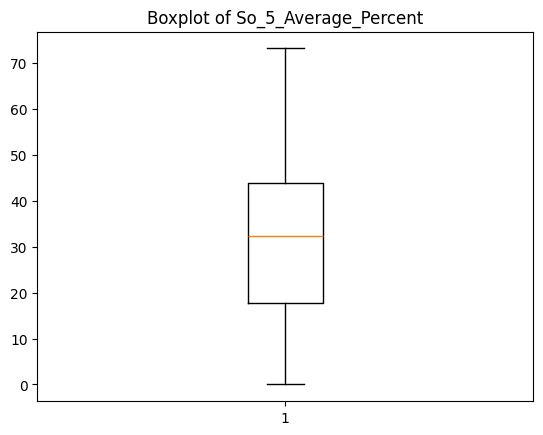

In [11]:
plt.boxplot(sorare_filtered_df['So_5_Average_Percent'])
plt.title('Boxplot of So_5_Average_Percent')
plt.show()

In [12]:
Q1 = sorare_filtered_df['Average_Price'].quantile(0.25)
Q3 = sorare_filtered_df['Average_Price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = sorare_filtered_df[(sorare_filtered_df['Average_Price'] < lower_bound) | (sorare_filtered_df['Average_Price'] > upper_bound)]
print(len(outliers['Average_Price']))
print(outliers['Average_Price'])

49
2        10820.40
15        9070.49
23        7776.39
24        8655.81
28       34966.00
39       15059.90
42        7669.96
46        7656.04
65       13967.00
77        7572.31
90       29194.51
91       10691.51
94       35915.80
126      14674.54
155      12978.16
159      19471.63
165      19945.64
181       8168.18
188      20164.65
200      66076.11
212       7860.55
222       8678.15
224      14329.14
236      13747.92
252       7958.91
254      13432.71
296      11626.24
320       9514.02
337      12294.63
360       9181.89
380       9736.44
381      20338.21
386       8738.58
389       8482.02
418       7677.25
443      13325.85
454      16829.06
488      24923.88
509       9990.96
513      12643.78
537      18768.15
555       9085.34
562       8148.57
565      34398.42
581       9929.26
647      29685.38
649    1350736.50
659      20481.85
672       8297.43
Name: Average_Price, dtype: float64


In [13]:
sorare_filtered_df['Z_Score_Price'] = stats.zscore(sorare_filtered_df['Average_Price'])

# Define outliers as points with a Z-score greater than 3 or less than -3
outliers = sorare_filtered_df[(sorare_filtered_df['Z_Score_Price'] > 3) | (sorare_filtered_df['Z_Score_Price'] < -3)]
print(len(outliers['Z_Score_Price']))
print(outliers['Z_Score_Price'])

sorare_filtered_df = sorare_filtered_df.drop(columns=['Z_Score', 'Z_Score_Price'])


1
649    21.221734
Name: Z_Score_Price, dtype: float64


In [14]:
# One-Hot Encoding for Current_Club
sorare_processed_df = pd.get_dummies(sorare_filtered_df, columns=['Current_Club'], drop_first=True)

# Label Encode positions
label_encoder = LabelEncoder()
sorare_processed_df['Position'] = label_encoder.fit_transform(sorare_processed_df['Position'])

sorare_processed_df.columns[30:80]

Index(['assistPenaltyWon_4', 'assistPenaltyWon_5', 'assistPenaltyWon_6',
       'assistPenaltyWon_7', 'assistPenaltyWon_8', 'assistPenaltyWon_9',
       'bigChanceCreated_0', 'bigChanceCreated_1', 'bigChanceCreated_2',
       'bigChanceCreated_3', 'bigChanceCreated_4', 'bigChanceCreated_5',
       'bigChanceCreated_6', 'bigChanceCreated_7', 'bigChanceCreated_8',
       'bigChanceCreated_9', 'cleanSheet_0', 'cleanSheet60_0', 'cleanSheet_1',
       'cleanSheet60_1', 'cleanSheet_2', 'cleanSheet60_2', 'cleanSheet_3',
       'cleanSheet60_3', 'cleanSheet_4', 'cleanSheet60_4', 'cleanSheet_5',
       'cleanSheet60_5', 'cleanSheet_6', 'cleanSheet60_6', 'cleanSheet_7',
       'cleanSheet60_7', 'cleanSheet_8', 'cleanSheet60_8', 'cleanSheet_9',
       'cleanSheet60_9', 'crossAccuracy_0', 'crossAccuracy_1',
       'crossAccuracy_2', 'crossAccuracy_3', 'crossAccuracy_4',
       'crossAccuracy_5', 'crossAccuracy_6', 'crossAccuracy_7',
       'crossAccuracy_8', 'crossAccuracy_9', 'duelWon_0', 'duelWo

In [15]:
sorare_processed_df['Age'].unique()

array([34, 22, 26, 31, 27, 36, 33, 29, 20, 28, 21, 24, 25, 23, 30, 18, 39,
       37, 32, 19, 38, 35, 75])

In [18]:
# Scaling columns with Standard Scaler
scaler = StandardScaler()
standard_scaler_columns = ['Age', 'Average_Price', 'So_5_Average_Percent']

sorare_processed_df[standard_scaler_columns] = scaler.fit_transform(sorare_processed_df[standard_scaler_columns])

# scale So_5_Scores and Avg Price
# scaling with numpy since data distribution is highly skewed - can handle zeros
columns_to_transform = []
for col in col_prefixes:
    for index in range(0, 10):
        columns_to_transform.append(f'{col}_{index}')
sorare_processed_df[columns_to_transform] = np.log1p(sorare_processed_df[columns_to_transform])  # log1p is log(1 + x) which handles zeros

sorare_processed_df['Has_Issue_Bool'] = sorare_processed_df['Active_Injuries_Bool'] | sorare_processed_df['Active_Suspensions_Bool']
sorare_processed_df = sorare_processed_df.drop(columns=['Display_Name',	'First_Name','Last_Name', 'Player_Number', 'Active_Injuries_Bool', 'Active_Suspensions_Bool'])

sorare_processed_df.head()

C:\Users\mttca\AppData\Local\Temp\ipykernel_26644\3181061478.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sorare_processed_df['Has_Issue_Bool'] = sorare_processed_df['Active_Injuries_Bool'] | sorare_processed_df['Active_Suspensions_Bool']


,So_5_Scores_0,So_5_Scores_1,So_5_Scores_2,So_5_Scores_3,So_5_Scores_4,So_5_Scores_5,So_5_Scores_6,So_5_Scores_7,So_5_Scores_8,So_5_Scores_9,...,Current_Club_Liverpool FC,Current_Club_Manchester City FC,Current_Club_Manchester United FC,Current_Club_Newcastle United FC,Current_Club_Nottingham Forest FC,Current_Club_Southampton FC,Current_Club_Tottenham Hotspur FC,Current_Club_West Ham United FC,Current_Club_Wolverhampton Wanderers FC,Has_Issue_Bool
0,0.000000,3.580737,0.000000,3.270329,3.520461,3.621136,0.000000,3.531055,3.915218,0.000000,...,False,False,False,False,False,False,False,True,False,1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,1
2,3.230804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,False,False,False,False,False,True,False,False,False,0
3,3.893452,3.574030,0.000000,3.893452,4.009150,4.368688,3.696351,3.664074,4.034241,3.559909,...,False,False,False,False,False,False,False,True,False,0
4,3.465736,3.443618,3.487375,3.532226,4.110874,3.540959,3.589059,3.543854,4.207673,2.580217,...,False,False,False,False,False,False,False,False,False,0


In [19]:
print(sorare_processed_df.shape)

(455, 330)


In [28]:
so_5_columns_to_drop = [f'{col_prefixes[0]}_{index}' for index in range(10, 15)]
columns_to_drop = [f'{col}_9' for col in col_prefixes]
columns_to_drop.extend(so_5_columns_to_drop)
print(columns_to_drop)

features_data = sorare_processed_df.drop(columns=columns_to_drop)
features_data.head(2)

['So_5_Scores_9', 'accuratePass_9', 'assistPenaltyWon_9', 'bigChanceCreated_9', 'cleanSheet_9', 'cleanSheet60_9', 'crossAccuracy_9', 'duelWon_9', 'effectiveClearance_9', 'errorLeadToGoal_9', 'fouls_9', 'gameStarted_9', 'goalAssist_9', 'goals_9', 'interceptionWon_9', 'lastManTackle_9', 'minsPlayed_9', 'ownGoals_9', 'passAccuracy_9', 'penaltiesSaved_9', 'penaltyConceded_9', 'penaltyKickMissed_9', 'penaltySave_9', 'redCard_9', 'saves_9', 'shotAccuracy_9', 'totalClearance_9', 'totalPass_9', 'wonTackle_9', 'yellowCard_9', 'So_5_Scores_10', 'So_5_Scores_11', 'So_5_Scores_12', 'So_5_Scores_13', 'So_5_Scores_14']


,So_5_Scores_0,So_5_Scores_1,So_5_Scores_2,So_5_Scores_3,So_5_Scores_4,So_5_Scores_5,So_5_Scores_6,So_5_Scores_7,So_5_Scores_8,accuratePass_0,...,Current_Club_Liverpool FC,Current_Club_Manchester City FC,Current_Club_Manchester United FC,Current_Club_Newcastle United FC,Current_Club_Nottingham Forest FC,Current_Club_Southampton FC,Current_Club_Tottenham Hotspur FC,Current_Club_West Ham United FC,Current_Club_Wolverhampton Wanderers FC,Has_Issue_Bool
0,0.0,3.580737,0.0,3.270329,3.520461,3.621136,0.0,3.531055,3.915218,0.0,...,False,False,False,False,False,False,False,True,False,1
1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,1


In [29]:
target_data = sorare_processed_df['So_5_Scores_9']
target_data.head(2)

0    0.0
1    0.0
Name: So_5_Scores_9, dtype: float64